<a href="https://colab.research.google.com/github/arezayan/Finite_Volume/blob/main/NYC_dL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#format print on numpy PrintOutS
np.set_printoptions(precision=3, suppress=True)

###
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_excel(r'/content/NYC_first_Df.xlsx')
data=df.iloc[:,1:5]
temp_air=df.iloc[:,5]
x_train, x_test, y_train, y_test = train_test_split(data,temp_air,train_size=0.7, random_state= 42)
#x_train=x_train['Center']

In [5]:
train_layer=np.array(x_train)
x_train_nor=layers.Normalization(input_shape=[1,] , axis=None)
x_train_nor.adapt(train_layer)


In [6]:
myModel = tf.keras.Sequential()
myModel.add(layers.Dense(64, activation='relu', input_shape=(4,)))
myModel.add(layers.Dense(64, activation='relu'))
myModel.add(layers.Dense(1))
myModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [7]:

myModel.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001), loss="mean_squared_error")


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [8]:
history = myModel.fit(x_train, y_train,  epochs=120, validation_split=0.2)

Epoch 1/120
4/4 [==============================] - 3s 44ms/step - loss: 1671.5065 - val_loss: 1087.2970
Epoch 2/120
4/4 [==============================] - 0s 8ms/step - loss: 1076.8796 - val_loss: 1440.4783
Epoch 3/120
4/4 [==============================] - 0s 7ms/step - loss: 1415.9900 - val_loss: 1401.0901
Epoch 4/120
4/4 [==============================] - 0s 8ms/step - loss: 1385.1241 - val_loss: 1367.3752
Epoch 5/120
4/4 [==============================] - 0s 8ms/step - loss: 1352.7117 - val_loss: 1329.9703
Epoch 6/120
4/4 [==============================] - 0s 9ms/step - loss: 1314.8624 - val_loss: 1285.0452
Epoch 7/120
4/4 [==============================] - 0s 8ms/step - loss: 1266.9163 - val_loss: 1223.1855
Epoch 8/120
4/4 [==============================] - 0s 8ms/step - loss: 1199.5232 - val_loss: 1057.0490
Epoch 9/120
4/4 [==============================] - 0s 8ms/step - loss: 2531.4216 - val_loss: 1562.8971
Epoch 10/120
4/4 [==============================] - 0s 7ms/step - loss: 

In [14]:
myModel.predict(x_test[:2])


1/1 [==============================] - 0s 15ms/step


array([[38.059],
       [38.059]], dtype=float32)

In [42]:
y_pred=myModel.predict(x_test)

2/2 [==============================] - 0s 3ms/step


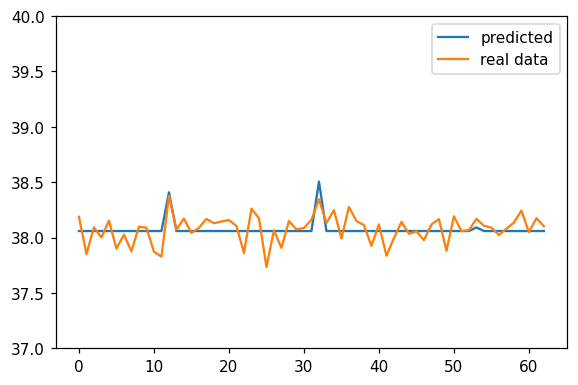

In [60]:
real=y_test.values
plt.figure(dpi=110)
plt.plot(y_pred,label='predicted')
plt.plot(real,label='real data')
plt.ylim([37,40])
plt.legend()


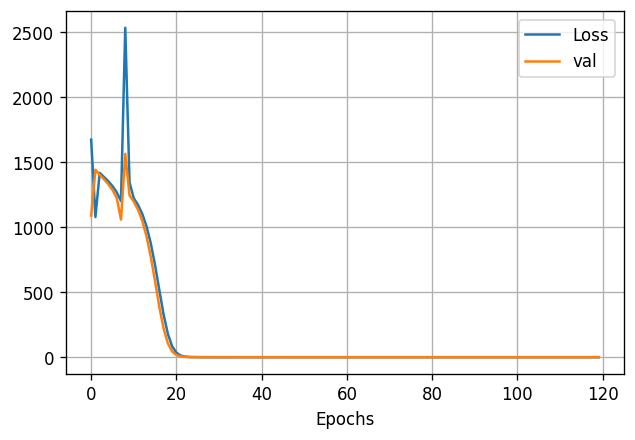

In [10]:
def plot_loss(history):
  losses = history.history['loss']
  val_losses = history.history['val_loss']
  plt.figure(dpi=120)
  plt.grid()
  plt.xlabel("Epochs")
  plt.plot(losses,label="Loss")
  plt.plot(val_losses, label="val")
  #plt.ylim([0,200])
  plt.legend()

plot_loss(history)